In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv(r'C:\Users\admin\Desktop\data\air_monthly.csv')

In [6]:
## AIR MONTHLY DATA OF CENTRAL/WESTER STATION
df


,YEAR,STATION,POLLUTANT,Month 01,Month 02,Month 03,Month 04,Month 05,Month 06,Month 07,Month 08,Month 09,Month 10,Month 11,Month 12
0,2017,CENTRAL/WESTERN,Fine Suspended Particulates,31,29,31,24,22,8,10,12,20,23,25,35
1,2017,CENTRAL/WESTERN,Nitrogen Dioxide,48,48,53,44,49,21,28,30,40,33,44,48
2,2017,CENTRAL/WESTERN,Nitrogen Oxides,64,67,71,61,66,32,42,46,57,41,56,62
3,2017,CENTRAL/WESTERN,Ozone,53,53,63,54,62,32,30,37,58,72,58,65
4,2017,CENTRAL/WESTERN,Respirable Suspended Particulates,45,42,51,36,33,16,13,20,29,37,40,56
5,2017,CENTRAL/WESTERN,Sulphur Dioxide,7,9,7,11,12,5,7,11,9,8,8,8
6,2018,CENTRAL/WESTERN,Fine Suspended Particulates,30,31,26,24,13,13,10,17,18,25,24,24
7,2018,CENTRAL/WESTERN,Nitrogen Dioxide,46,53,50,41,27,28,20,34,40,42,44,49
8,2018,CENTRAL/WESTERN,Nitrogen Oxides,62,86,79,57,38,36,32,48,60,51,56,73
9,2018,CENTRAL/WESTERN,Ozone,51,48,61,53,44,54,33,54,53,93,60,36


In [7]:
#checking missing values

df.isna().sum()

YEAR         0
STATION      0
POLLUTANT    0
Month 01     0
Month 02     0
Month 03     0
Month 04     0
Month 05     0
Month 06     0
Month 07     0
Month 08     0
Month 09     0
Month 10     0
Month 11     0
Month 12     0
dtype: int64

In [8]:
#data types
df.dtypes

YEAR          int64
STATION      object
POLLUTANT    object
Month 01      int64
Month 02      int64
Month 03      int64
Month 04      int64
Month 05      int64
Month 06      int64
Month 07      int64
Month 08      int64
Month 09      int64
Month 10      int64
Month 11      int64
Month 12      int64
dtype: object

In [9]:
print("pollutant disribution\n".upper(),df['POLLUTANT'].value_counts(),'\n')
print("year\n".upper(),df['YEAR'].value_counts(),'\n')
print("station".upper(),df['STATION'].value_counts())

POLLUTANT DISRIBUTION
 Fine Suspended Particulates          5
Nitrogen Dioxide                     5
Nitrogen Oxides                      5
Ozone                                5
Respirable Suspended Particulates    5
Sulphur Dioxide                      5
Name: POLLUTANT, dtype: int64 

YEAR
 2017    6
2018    6
2019    6
2020    6
2021    6
Name: YEAR, dtype: int64 

STATION CENTRAL/WESTERN    30
Name: STATION, dtype: int64


## Monthly analysis


In [10]:
month_df = df.drop(columns=['YEAR','STATION','POLLUTANT'])
month_df



,Month 01,Month 02,Month 03,Month 04,Month 05,Month 06,Month 07,Month 08,Month 09,Month 10,Month 11,Month 12
0,31,29,31,24,22,8,10,12,20,23,25,35
1,48,48,53,44,49,21,28,30,40,33,44,48
2,64,67,71,61,66,32,42,46,57,41,56,62
3,53,53,63,54,62,32,30,37,58,72,58,65
4,45,42,51,36,33,16,13,20,29,37,40,56
5,7,9,7,11,12,5,7,11,9,8,8,8
6,30,31,26,24,13,13,10,17,18,25,24,24
7,46,53,50,41,27,28,20,34,40,42,44,49
8,62,86,79,57,38,36,32,48,60,51,56,73
9,51,48,61,53,44,54,33,54,53,93,60,36


In [16]:
## 2017 monthly analysis

filt = df['YEAR'] == 2017
df[filt]

,YEAR,STATION,POLLUTANT,Month 01,Month 02,Month 03,Month 04,Month 05,Month 06,Month 07,Month 08,Month 09,Month 10,Month 11,Month 12
0,2017,CENTRAL/WESTERN,Fine Suspended Particulates,31,29,31,24,22,8,10,12,20,23,25,35
1,2017,CENTRAL/WESTERN,Nitrogen Dioxide,48,48,53,44,49,21,28,30,40,33,44,48
2,2017,CENTRAL/WESTERN,Nitrogen Oxides,64,67,71,61,66,32,42,46,57,41,56,62
3,2017,CENTRAL/WESTERN,Ozone,53,53,63,54,62,32,30,37,58,72,58,65
4,2017,CENTRAL/WESTERN,Respirable Suspended Particulates,45,42,51,36,33,16,13,20,29,37,40,56
5,2017,CENTRAL/WESTERN,Sulphur Dioxide,7,9,7,11,12,5,7,11,9,8,8,8


In [52]:
month_df.iloc[0]

Month 01    31
Month 02    29
Month 03    31
Month 04    24
Month 05    22
Month 06     8
Month 07    10
Month 08    12
Month 09    20
Month 10    23
Month 11    25
Month 12    35
Name: 0, dtype: int64

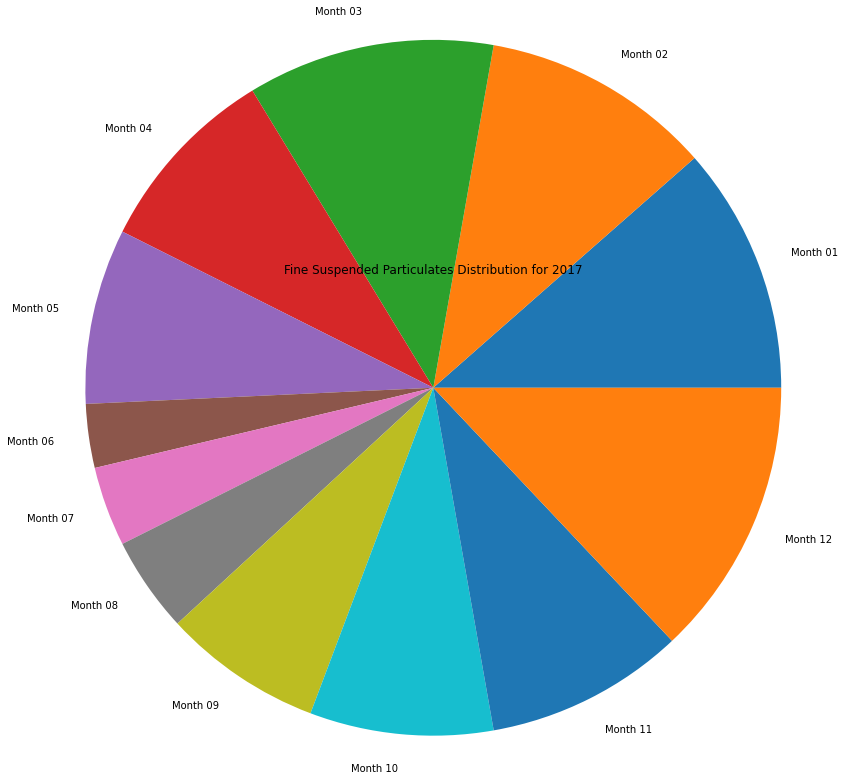

In [53]:
plt.figure()
plt.pie(month_df.iloc[0],labels=df.columns[3:15],radius=4)
plt.title('Fine Suspended Particulates Distribution for 2017',)
plt.show()

In [55]:
# average of fine suspended particulates 

print('The mean is>>',)

The mean is>> 22.5


In [ ]:
#Nitrogen Dioxide analysis


In [58]:
month_df.iloc[1]

Month 01    48
Month 02    48
Month 03    53
Month 04    44
Month 05    49
Month 06    21
Month 07    28
Month 08    30
Month 09    40
Month 10    33
Month 11    44
Month 12    48
Name: 1, dtype: int64

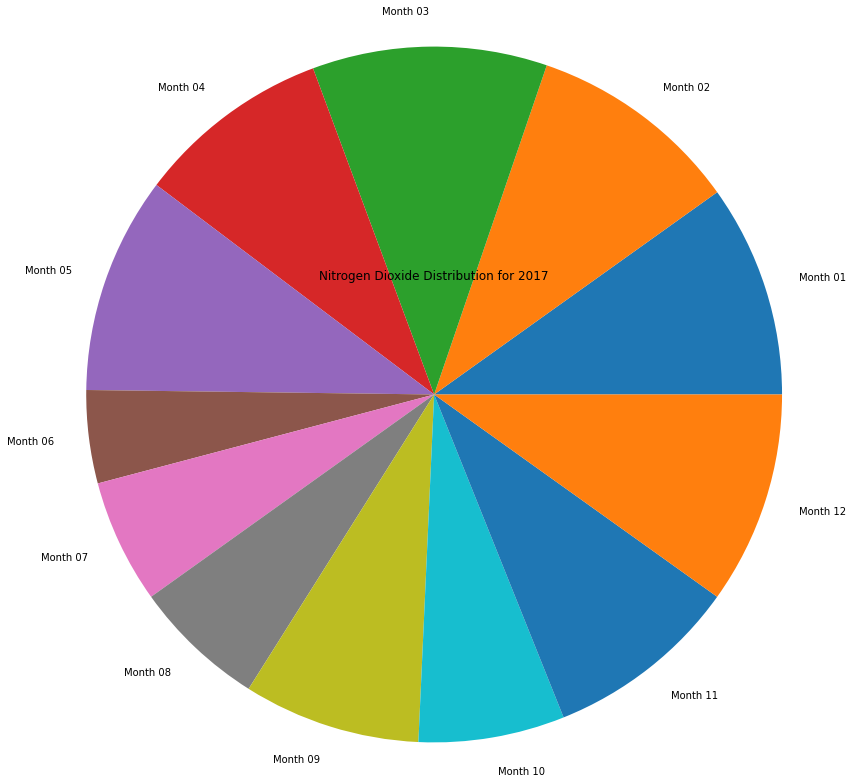

In [60]:
plt.figure()
plt.pie(month_df.iloc[1],labels=df.columns[3:15],radius=4)
plt.title('Nitrogen Dioxide Distribution for 2017',)
plt.show()

In [56]:
## 2018 monthly analysis

In [57]:
filt = df['YEAR'] == 2018
df[filt]

,YEAR,STATION,POLLUTANT,Month 01,Month 02,Month 03,Month 04,Month 05,Month 06,Month 07,Month 08,Month 09,Month 10,Month 11,Month 12
6,2018,CENTRAL/WESTERN,Fine Suspended Particulates,30,31,26,24,13,13,10,17,18,25,24,24
7,2018,CENTRAL/WESTERN,Nitrogen Dioxide,46,53,50,41,27,28,20,34,40,42,44,49
8,2018,CENTRAL/WESTERN,Nitrogen Oxides,62,86,79,57,38,36,32,48,60,51,56,73
9,2018,CENTRAL/WESTERN,Ozone,51,48,61,53,44,54,33,54,53,93,60,36
10,2018,CENTRAL/WESTERN,Respirable Suspended Particulates,44,47,42,42,22,21,18,24,29,41,37,38
11,2018,CENTRAL/WESTERN,Sulphur Dioxide,7,12,8,6,6,8,9,10,8,6,5,4


In [59]:
month_df.dtypes

Month 01     int64
Month 02     int64
Month 03     int64
Month 04     int64
Month 05     int64
Month 06     int64
Month 07     int64
Month 08     int64
Month 09    object
Month 10    object
Month 11    object
Month 12    object
dtype: object